# 자동으로 모은 중고 자동차 데이터 분석해보기

- vehkcles.csv <br>
id : 중고차 거래의 아이디<br>
url : 중고차 거래 페이지<br>
region : 해당 거래의 관리 지점<br>
region_url : 거래 관리 지점의 홈페이지<br>
price : 기입된 자동차의 거래가<br>
year : 거래가 기입된 년도<br>
manufacturer : 자동차를 생산한 회사<br>
model : 자동차 모델명<br>
condition : 자동차의 상태<br>
cylinders : 자동차의 기통 수 <br>
fuel : 자동차의 연료 타입 <br>
odometer : 자동차의 운행 마일 수 <br>
title_status : 자동차의 타이틀 상태(소유주 등록 상태)<br>
transmission : 자동차의 트랜스미션 종류<br>
vin : 자동차의 식별 번호<br>
drive : 자동차의 구동 타입 <br>
size : 자동차 크기<br>
type : 자동차의 일반 타입 (세단, Suv, ... )<br>
paint_color : 자동차 색상 <br>
image_url : 자동차 이미지 <br>
description : 세부 설명 <br>
county : 실수로 생성된 미사용 컬럼<br>
state : 거래가 업로드 된 미 주 <br>
lat : 거래가 업로드된 곳의 위도 <br>
long : 거래가 업로드된 곳의 경도 <br>

- 데이터 출처 : https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'gustn6839'
os.environ['KAGGLE_KEY'] = 

In [3]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  craigslist-carstrucks-data.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: vehicles.csv            vehicles.csv



In [4]:
df = pd.read_csv('vehicles.csv')

In [5]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [6]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date'], axis=1, inplace=True)

In [9]:
# 'year' 컬럼을 'age' 컬럼으로 변경하기
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [10]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,11.0
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,7.0
2,auburn,4900,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,15.0
3,auburn,2000,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,47.0
4,auburn,19500,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,16.0


In [11]:
# 범주형 데이터의 값의 범위, 기초 통계 분석하기
len(df['manufacturer'].value_counts())

43

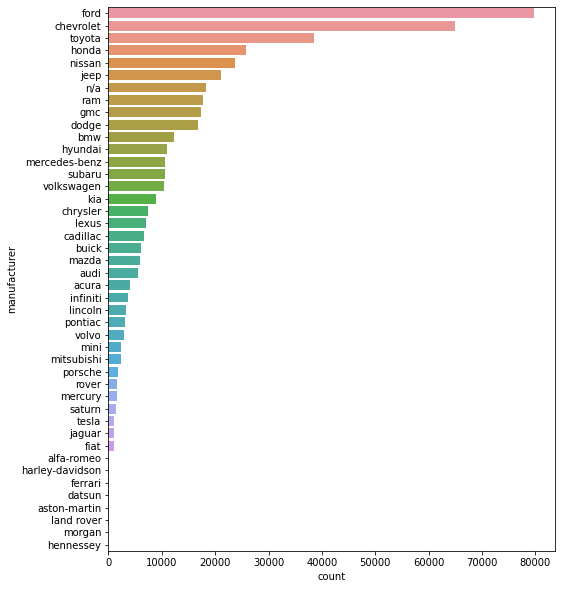

In [12]:
plt.figure(figsize=(8,10))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index);

### 수치형 데이터 통계분석

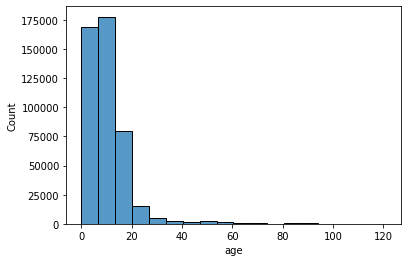

In [13]:
sns.histplot(x='age', data=df, bins=18);

### 데이터 클리닝

### 범주형 데이터 클리닝

In [15]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# 4. Classifier를 학습해서 결손 데이터를 추정하여 채워넣기

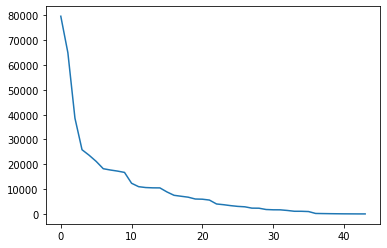

In [16]:
col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)

- 각 컬럼들의 숫자가 어떻게 되는지 그래프로 확인

In [20]:
n_categorical = 10
counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others')

In [21]:
df[col].value_counts()

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

In [42]:
df.drop('title_status', axis=1, inplace=True)

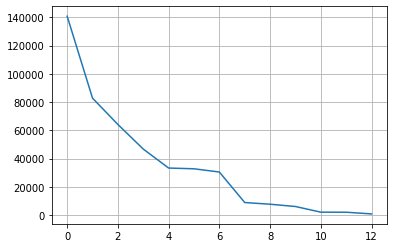

In [58]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [59]:
n_categorical = 7
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [60]:
df[col].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

In [61]:
df.loc[df[col] == 'other', col] = 'others'

In [62]:
df[col].fillna('others', inplace=True)

### 수치형 데이터 시각화하여 분석하기

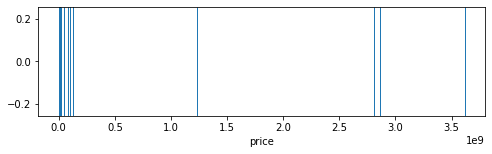

In [63]:
# 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot 활용
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

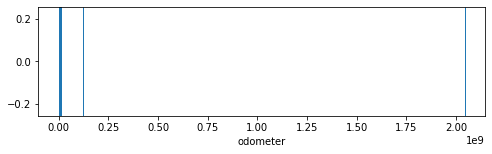

In [64]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

- 많은 수의 outlier 형성

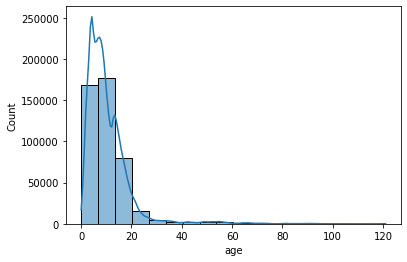

In [65]:
sns.histplot(x='age', data=df, bins=18, kde=True)

### 수치형 데이터 클리닝

In [67]:
# quantile() 메소드 이용하여 outlier 제거하고 시각화
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.1)
print(p1, p2)

59900.0 651.0


In [69]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [70]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

272803.10999999824 18593.0


In [71]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [72]:
df.describe()

,price,odometer,age
count,322166.000000,322166.000000,321666.000000
mean,15211.239072,103341.828089,10.220235
std,11248.543565,55049.524247,7.071633
min,652.000000,18596.000000,0.000000
25%,6500.000000,57454.000000,6.000000
50%,12000.000000,98850.000000,9.000000
75%,20990.000000,141000.000000,13.000000
max,59895.000000,272742.000000,121.000000


### 범주형 데이터 시각화하여 분석하기

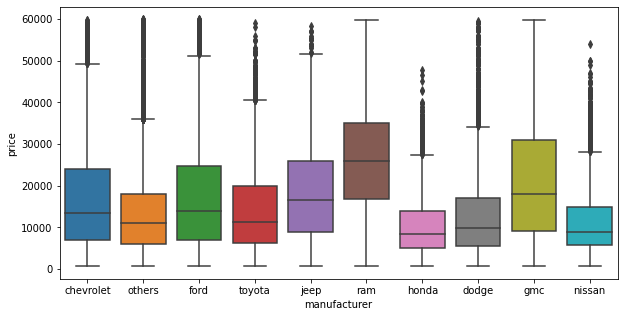

In [73]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='manufacturer', y='price', data=df)

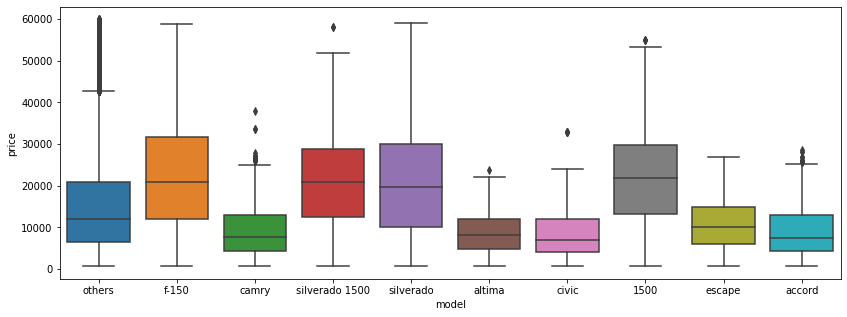

In [74]:
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='model', y='price', data=df)

### 컬럼 간의 Correlation Heatmap으로 시각화

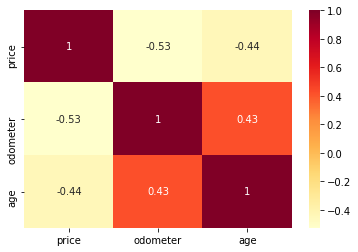

In [75]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

# 모델 학습을 위한 데이터 전처리

In [77]:
# StandardScaler를 이용해 수치형 데이터 표준화하기
from sklearn.preprocessing import StandardScaler

In [78]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기

X_num = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns = X_num.columns)

# get_dummies를 아용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat)

# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [79]:
X.head()

,odometer,age,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_toyota,model_1500,model_accord,model_altima,model_camry,model_civic,model_escape,model_f-150,model_others,model_silverado,model_silverado 1500,condition_excellent,condition_good,condition_others,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_diesel,fuel_gas,fuel_others,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_others,drive_rwd,size_full-size,size_others,type_SUV,type_coupe,type_hatchback,type_others,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,-1.282480,0.110267,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,-0.176965,-0.455374,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,-0.296022,0.675908,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.574188,5.201037,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.229942,0.817318,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [81]:
X.isna().sum()

odometer                 0
age                    500
region_columbus          0
region_fayetteville      0
region_jacksonville      0
                      ... 
paint_color_grey         0
paint_color_others       0
paint_color_red          0
paint_color_silver       0
paint_color_white        0
Length: 61, dtype: int64

In [83]:
X.fillna(0.0, inplace=True)

### 학습데이터와 테스트데이터 분리하기

In [80]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Regression
### XGBoost Regression

In [86]:
from xgboost import XGBRegressor

In [92]:
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

[04:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 모델 학습 결과 평가

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [93]:
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

3773.7334685665946
5607.635543614069


# 모델 학습 결과 심화 분석
### 실제 값과 추측 값의 Scatter plot 시각화

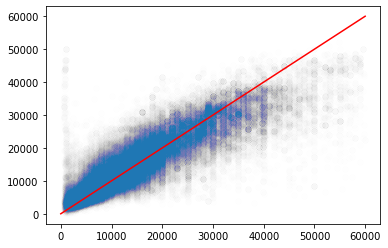

In [97]:
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0, 60000], [0,60000], 'r-')

- 저렴한 차들에 대해서는 효과적으로 분석.
- 대부분의 차들은 빨간 선 주변에 존재.
- 차 값은 굉장히 저렴한테 굉장히 비싸다고 추정한 값이 있음

### 에러 값의 히스토그램 확인

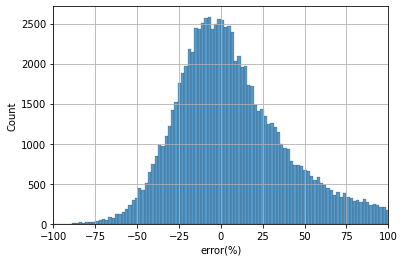

In [107]:
err = (pred - y_test) / y_test * 100
sns.histplot(err[err < 300])
plt.xlabel('error(%)')
plt.grid()
plt.xlim(-100, 100);

- 기본적으로 값은 0을 기준으로 왼 쪽으로 치우쳐져있음.
- 값을 under_estimate 하는 것들을 볼 수 있음.
- under_estimate는 최대 100을 넘지 않는데, 100을 넘게 되면 음수로 출력
- 양의 값이 100이 넘는 경우, 실제 값이 싼 경우에 비싼 것으로 오해하는 경우가 생김.

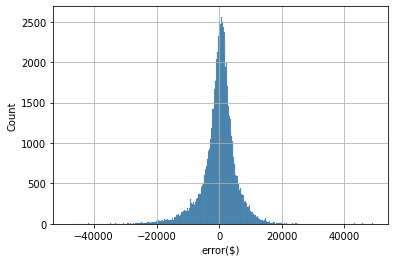

In [110]:
err = (pred - y_test)
sns.histplot(err)
plt.xlabel('error($)') # 에러율이 아닌 에러 값 확인
plt.grid()